In [2]:
# 决策树是一个树状模型，每个节点都做出一个决策，从而影响最终结果
# 叶子节点表示输出数值，分支表示根据输入特征做出中间决策
# AdaBoost算法是指自适应增强算法，这是一种利用其他系统增强模型准确性的技术
# 这种技术是将不同版本的算法结果进行组合，用甲醛汇总的方式获得最终结果，被称为弱学习器（weak learners）
# AdaBoost算法在每个阶段获取的信息都会反馈到模型中，这样学习期就可以在后一阶段重点训练难以分类样本，这种学习方式可以增强系统的准确性

import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle

import matplotlib.pyplot as plt

housing_data = datasets.load_boston()

In [3]:
X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

# 拟合决策树回归模型
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(X_train, y_train)

# 带AdaBoost算法的决策树回归模型进行拟合
ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
    n_estimators=400,
    random_state=7)
ab_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=400,
         random_state=7)

In [5]:
# 评估决策树回归器的训练效果

y_pred_dt = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dt)
evs = explained_variance_score(y_test, y_pred_dt)

print("#### Decision Tree performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

#### Decision Tree performance ####
Mean squared error = 14.79
Explained variance score = 0.82


In [6]:
# 评估经由AdaBoost算法改善的效果

y_pred_ab = ab_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ab)
evs = explained_variance_score(y_test, y_pred_ab)

print("#### AdaBoost performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

#### AdaBoost performance ####
Mean squared error = 7.64
Explained variance score = 0.91


In [7]:
# 计算特征的相对重要性
# 回归器对象有一个feature_importances_方法可以告诉我们每个特征的相对重要性
# 先写一个画图的函数

def plot_feature_importances(feature_importances, title, feature_names):

    feature_importances = 100.0 * (feature_importances / max(feature_importances))

    index_sorted = np.flipud(np.argsort(feature_importances))

    pos = np.arange(index_sorted.shape[0]) + 0.5

    plt.figure()
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()

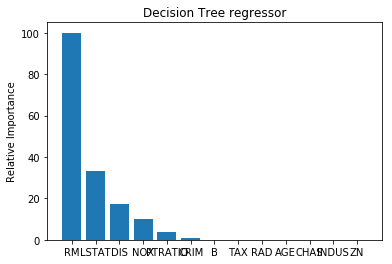

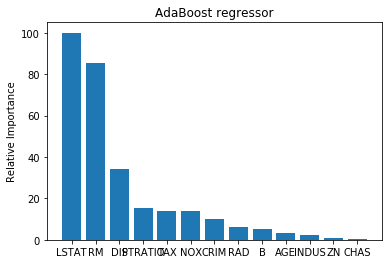

In [8]:
plot_feature_importances(dt_regressor.feature_importances_, 'Decision Tree regressor', housing_data.feature_names)
plot_feature_importances(ab_regressor.feature_importances_, 'AdaBoost regressor', housing_data.feature_names)